In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Zadanie 1-1

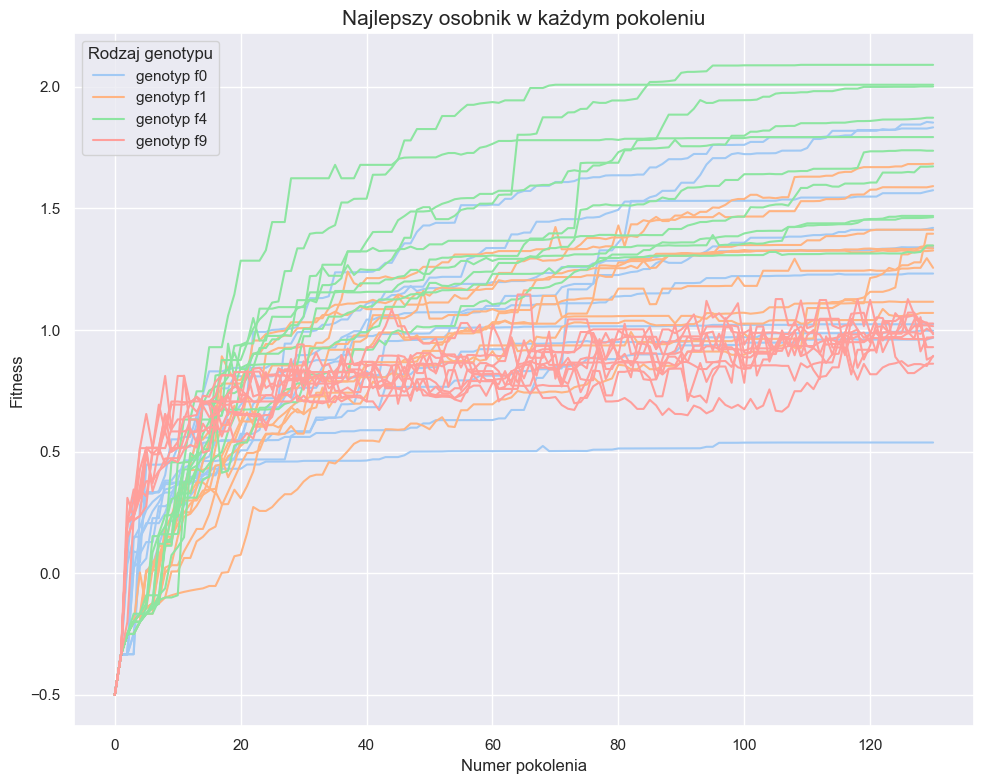

In [21]:
G_VALUES = ["0", "1", "4", "9"]
palette = sns.color_palette("pastel", len(G_VALUES))
color_map = dict(zip(G_VALUES, palette)) 
plt.figure(figsize=(10, 8))

for g_value in G_VALUES:
    for i in range(1, 11):
        df = pd.read_csv(f"../framspy/lab4/f{g_value}/Deap/{i}.csv", usecols=['gen', 'max'])
        sns.lineplot(df, x='gen', y='max', color=color_map[g_value], label=f"genotyp f{g_value}" if i == 1 else "")

plt.title("Najlepszy osobnik w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Rodzaj genotypu")
plt.tight_layout()
plt.savefig('1-przebiegi.png')
plt.show()

# Zadanie 1-2

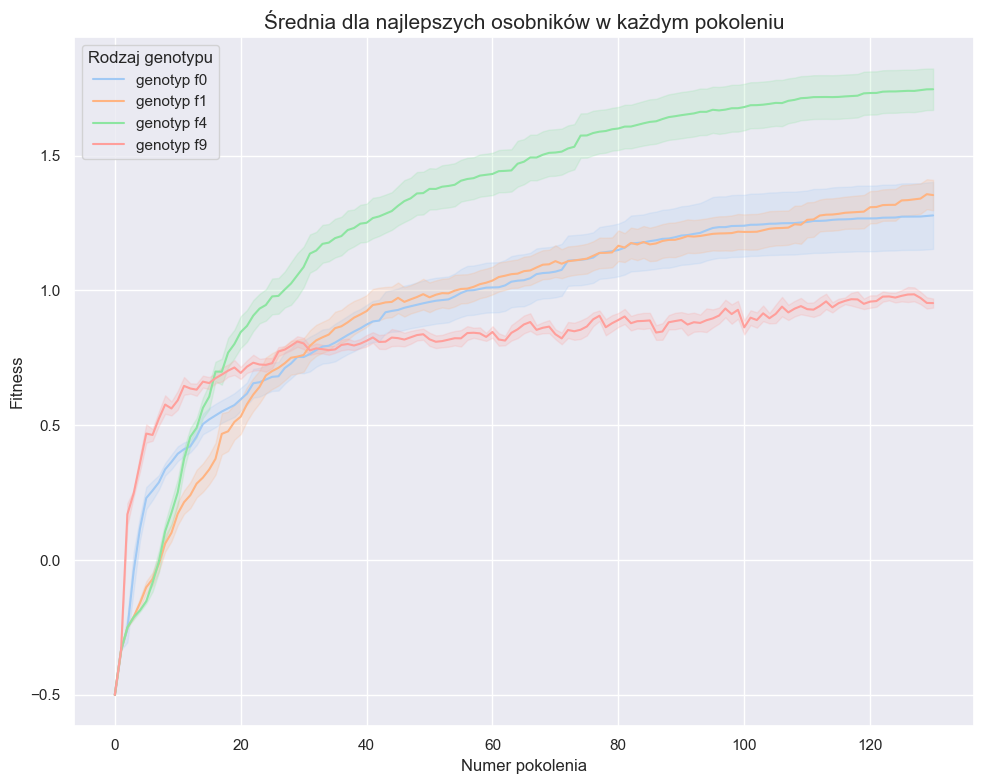

In [22]:
plt.figure(figsize=(10, 8))
for g_value in G_VALUES:
    df = pd.DataFrame()
    for i in range(1, 11):
        df_temp = pd.read_csv(f"../framspy/lab4/f{g_value}/Deap/{i}.csv", usecols=['gen', 'max'])
        df = pd.concat([df, df_temp])
    sns.lineplot(df, x='gen', y='max', color=color_map[g_value], label=f"genotyp f{g_value}", errorbar=("sd", 0.3))   

plt.title("Średnia dla najlepszych osobników w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Rodzaj genotypu")
plt.tight_layout()
plt.savefig('1-przebiegi-agregacja.png')
plt.show()

# Zadanie 1-3

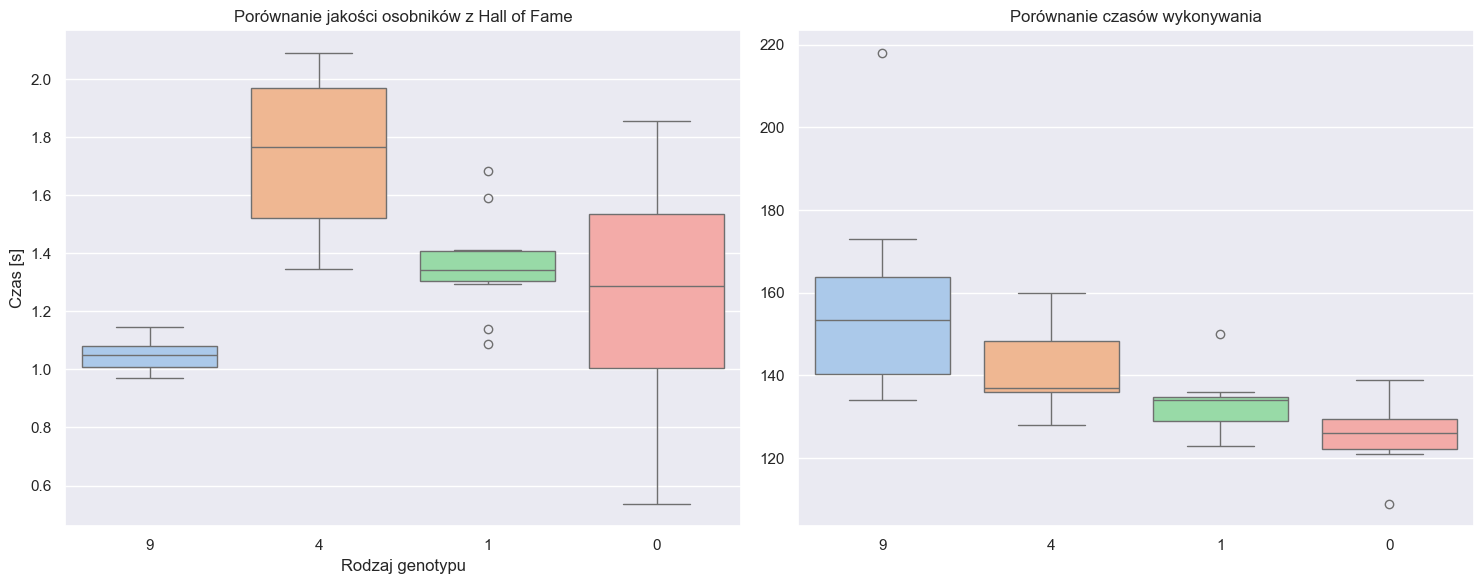

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes = axes.flatten()

# FITNESS
data = {g_value: [] for g_value in G_VALUES}
for g_value in G_VALUES:
    for i in range(1, 11):
        with open(f"../framspy/lab4/f{g_value}/HoF/{i}.gen") as file:
            for line in file:
                if line.startswith("vertpos"):
                    value = float(line.split(':')[1])
                    data[g_value].append(value)
        
df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel', ax=axes[0])
axes[0].set_title("Porównanie jakości osobników z Hall of Fame")
axes[0].set_xlabel("Rodzaj genotypu")
axes[0].set_ylabel("Fitness")

# EXECUTION TIME
data = {g_value: [] for g_value in G_VALUES}
for g_value in G_VALUES:
    df = pd.read_csv(f"../framspy/lab4/f{g_value}/times.txt")
    data[g_value] = df['time'].to_list()
    
df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel', ax=axes[1])
axes[1].set_title("Porównanie czasów wykonywania")
axes[0].set_xlabel("Rodzaj genotypu")
axes[0].set_ylabel("Czas [s]")

plt.tight_layout()
plt.savefig('1-boxplot.png')
plt.show()